<a href="https://colab.research.google.com/github/TarunBevara10/Major-Project---Data-Science/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Science/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94153,ZWE,Africa,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,1.714,2630.168,4.104,2.288,107.920,0.336,0.115,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1817.0,557596.0,37.516,0.122,1863.0,0.125,0.018,54.8,tests performed,1048504.0,684164.0,364340.0,8290.0,13588.0,7.05,4.60,2.45,914.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
94154,ZWE,Africa,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,1.857,2633.667,3.499,2.172,107.987,0.067,0.125,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2291.0,559887.0,37.670,0.154,1928.0,0.130,0.017,59.7,tests performed,1056238.0,685564.0,370674.0,7734.0,11349.0,7.11,4.61,2.49,764.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
94155,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,2635.282,1.615,2.259,107.987,0.000,0.106,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932.0,561819.0,37.800,0.130,1914.0,0.129,0.018,57.0,tests performed,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0,48.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94158 entries, 0 to 94157
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               94158 non-null  object 
 1   continent                              89705 non-null  object 
 2   location                               94158 non-null  object 
 3   date                                   94158 non-null  object 
 4   total_cases                            91157 non-null  float64
 5   new_cases                              91154 non-null  float64
 6   new_cases_smoothed                     90144 non-null  float64
 7   total_deaths                           81202 non-null  float64
 8   new_deaths                             81357 non-null  float64
 9   new_deaths_smoothed                    90144 non-null  float64
 10  total_cases_per_million                90670 non-null  float64
 11  ne

**PREPROCESSING**

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                 4453
location                                     0
date                                         0
total_cases                               3001
new_cases                                 3004
new_cases_smoothed                        4014
total_deaths                             12956
new_deaths                               12801
new_deaths_smoothed                       4014
total_cases_per_million                   3488
new_cases_per_million                     3491
new_cases_smoothed_per_million            4496
total_deaths_per_million                 13430
new_deaths_per_million                   13275
new_deaths_smoothed_per_million           4496
reproduction_rate                        18215
icu_patients                             84650
icu_patients_per_million                 84650
hosp_patients                            82353
hosp_patients_per_million                82353
weekly_icu_ad

**Filling 0 in place of NA **




In [ ]:
df['new_cases'] = df['new_cases'].fillna(0)

**Converting Datatypes of date and new cases into integer type**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['new_cases'] = df['new_cases'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94158 entries, 0 to 94157
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               94158 non-null  object        
 1   continent                              89705 non-null  object        
 2   location                               94158 non-null  object        
 3   date                                   94158 non-null  datetime64[ns]
 4   total_cases                            91157 non-null  float64       
 5   new_cases                              94158 non-null  int64         
 6   new_cases_smoothed                     90144 non-null  float64       
 7   total_deaths                           81202 non-null  float64       
 8   new_deaths                             81357 non-null  float64       
 9   new_deaths_smoothed                    90144 non-null  float6

**Labelling Date as ds and new cases as y**

In [ ]:
df = df.rename(columns = {'date':'ds' , 'new_cases':'y'})

**FbProphet For FORECASTING**

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


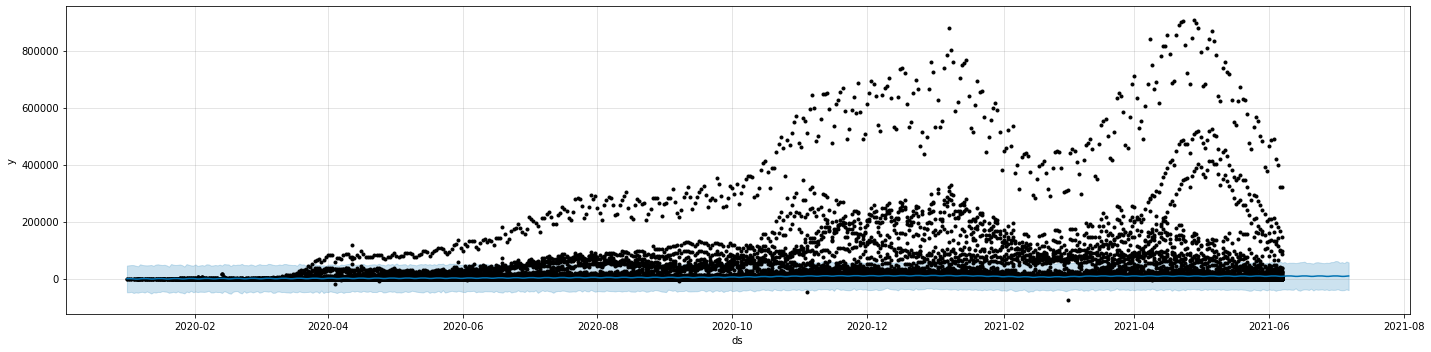

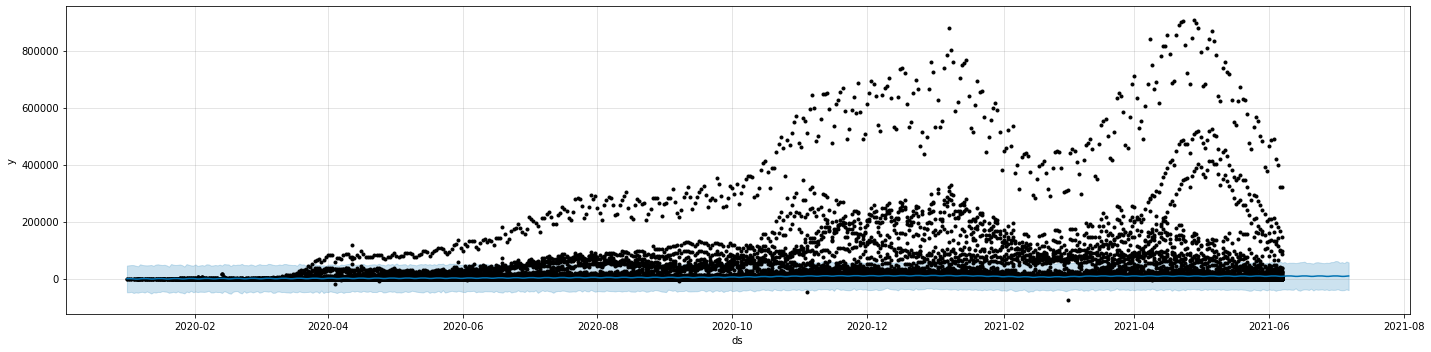

In [ ]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.1)
model.fit(df)
x = model.make_future_dataframe(periods = 30 , freq = 'D')
forecast = model.predict(x)
df1 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
model.plot(forecast,figsize=(20,5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94158 entries, 0 to 94157
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               94158 non-null  object        
 1   continent                              89705 non-null  object        
 2   location                               94158 non-null  object        
 3   ds                                     94158 non-null  datetime64[ns]
 4   total_cases                            91157 non-null  float64       
 5   y                                      94158 non-null  int64         
 6   new_cases_smoothed                     90144 non-null  float64       
 7   total_deaths                           81202 non-null  float64       
 8   new_deaths                             81357 non-null  float64       
 9   new_deaths_smoothed                    90144 non-null  float6

**HIGHEST NUMBER OF CASES**

In [ ]:
top = df.nlargest(5,'total_cases')
top.head(5)

,iso_code,continent,location,ds,total_cases,y,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
92841,OWID_WRL,NaN,World,2021-06-07,173631266.0,320618,414268.714,3736961.0,8076.0,10209.000,22275.273,41.132,53.147,479.417,1.036,1.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.184594e+09,917861352.0,467035736.0,27170026.0,34474260.0,28.03,11.78,5.99,4423.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92840,OWID_WRL,NaN,World,2021-06-06,173310648.0,322641,422595.429,3728885.0,7149.0,10299.286,22234.140,41.392,54.215,478.381,0.917,1.321,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.157424e+09,910369597.0,463607367.0,29814648.0,35774538.0,27.68,11.68,5.95,4590.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92839,OWID_WRL,NaN,World,2021-06-05,172988007.0,398361,432421.714,3721736.0,9167.0,10437.429,22192.748,51.106,55.476,477.464,1.176,1.339,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127610e+09,899319943.0,459364002.0,33478246.0,35849687.0,27.30,11.54,5.89,4599.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92838,OWID_WRL,NaN,World,2021-06-04,172589646.0,419717,444272.143,3712569.0,10939.0,10666.000,22141.642,53.846,56.996,476.288,1.403,1.368,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.094131e+09,888572470.0,455225311.0,38009551.0,35585157.0,26.87,11.40,5.84,4565.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92837,OWID_WRL,NaN,World,2021-06-03,172169929.0,489117,455781.857,3701630.0,9909.0,10813.143,22087.797,62.749,58.473,474.885,1.271,1.387,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.056122e+09,876583055.0,450130753.0,34980845.0,34944857.0,26.38,11.25,5.77,4483.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


**LOWEST NUMBER OF CASES**

In [ ]:
bottom = df.nsmallest(5,'total_cases')
bottom.head(5)

,iso_code,continent,location,ds,total_cases,y,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


**HIGHEST NUMBER OF DEATHS**

In [ ]:
top_deaths = df.nlargest(5,'total_deaths')
top_deaths.head(5)

,iso_code,continent,location,ds,total_cases,y,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
92841,OWID_WRL,NaN,World,2021-06-07,173631266.0,320618,414268.714,3736961.0,8076.0,10209.000,22275.273,41.132,53.147,479.417,1.036,1.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.184594e+09,917861352.0,467035736.0,27170026.0,34474260.0,28.03,11.78,5.99,4423.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92840,OWID_WRL,NaN,World,2021-06-06,173310648.0,322641,422595.429,3728885.0,7149.0,10299.286,22234.140,41.392,54.215,478.381,0.917,1.321,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.157424e+09,910369597.0,463607367.0,29814648.0,35774538.0,27.68,11.68,5.95,4590.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92839,OWID_WRL,NaN,World,2021-06-05,172988007.0,398361,432421.714,3721736.0,9167.0,10437.429,22192.748,51.106,55.476,477.464,1.176,1.339,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127610e+09,899319943.0,459364002.0,33478246.0,35849687.0,27.30,11.54,5.89,4599.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92838,OWID_WRL,NaN,World,2021-06-04,172589646.0,419717,444272.143,3712569.0,10939.0,10666.000,22141.642,53.846,56.996,476.288,1.403,1.368,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.094131e+09,888572470.0,455225311.0,38009551.0,35585157.0,26.87,11.40,5.84,4565.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
92837,OWID_WRL,NaN,World,2021-06-03,172169929.0,489117,455781.857,3701630.0,9909.0,10813.143,22087.797,62.749,58.473,474.885,1.271,1.387,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.056122e+09,876583055.0,450130753.0,34980845.0,34944857.0,26.38,11.25,5.77,4483.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


**LOWEST NUMBER OF DEATHS**

In [ ]:
bottom_deaths = df.nsmallest(5,'total_deaths')
bottom_deaths.head(5)

,iso_code,continent,location,ds,total_cases,y,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
27,AFG,Asia,Afghanistan,2020-03-22,34.0,4,2.571,1.0,1.0,0.143,0.873,0.103,0.066,0.026,0.026,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
28,AFG,Asia,Afghanistan,2020-03-23,41.0,7,3.286,1.0,0.0,0.143,1.053,0.180,0.084,0.026,0.000,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
29,AFG,Asia,Afghanistan,2020-03-24,43.0,2,3.286,1.0,0.0,0.143,1.105,0.051,0.084,0.026,0.000,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.93,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
494,OWID_AFR,NaN,Africa,2020-03-08,83.0,40,11.286,1.0,1.0,0.143,0.062,0.030,0.008,0.001,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,OWID_AFR,NaN,Africa,2020-03-09,91.0,8,11.857,1.0,0.0,0.143,0.068,0.006,0.009,0.001,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
